In [3]:
import BigKindsParser as bkp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

import konlpy
okt = konlpy.tag.Okt()

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['figure.figsize'] = 10,10
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [4]:
news_df = pd.read_excel("./inha_3month.xlsx", engine = 'openpyxl')

## 언론사 확인

In [5]:
press = bkp.press_counter(news_df)

<AxesSubplot:xlabel='기사', ylabel='언론사'>

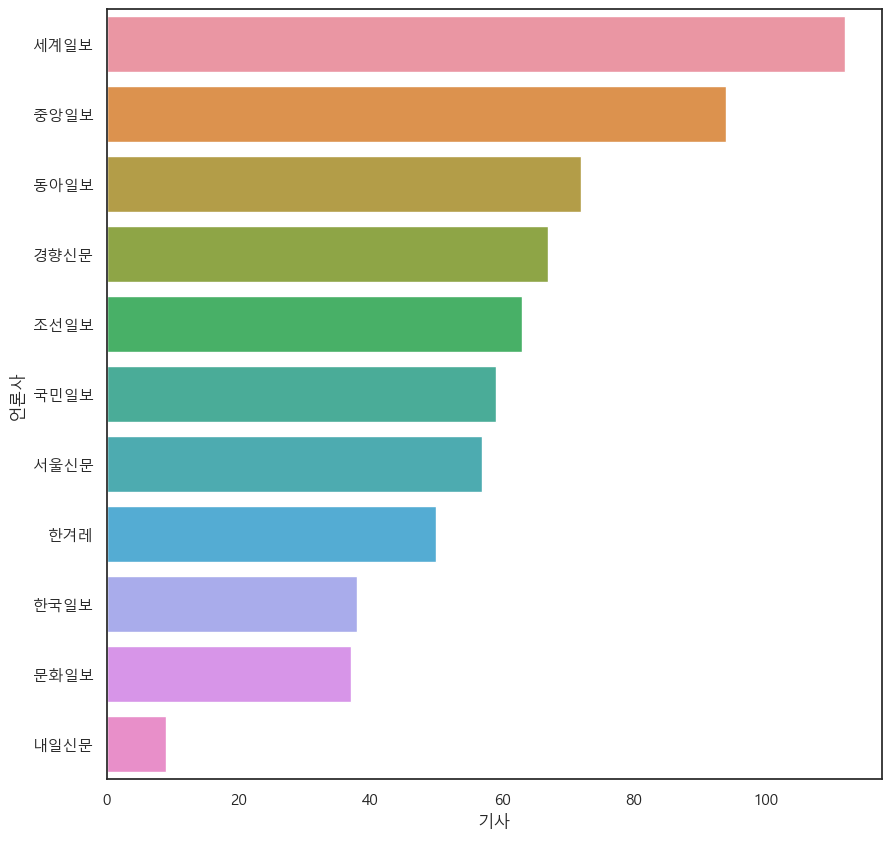

In [6]:
sns.barplot(data = press, x = "기사", y = "언론사")

## 키워드 빈도

In [7]:
lis = bkp.keywords_list(news_df["키워드"])

In [8]:
key = bkp.keyword_parser(lis)

In [9]:
key = bkp.duplication_remover(key)

In [10]:
key_words = bkp.word_counter(key)
key_words = bkp.counter_to_DataFrame(key_words)

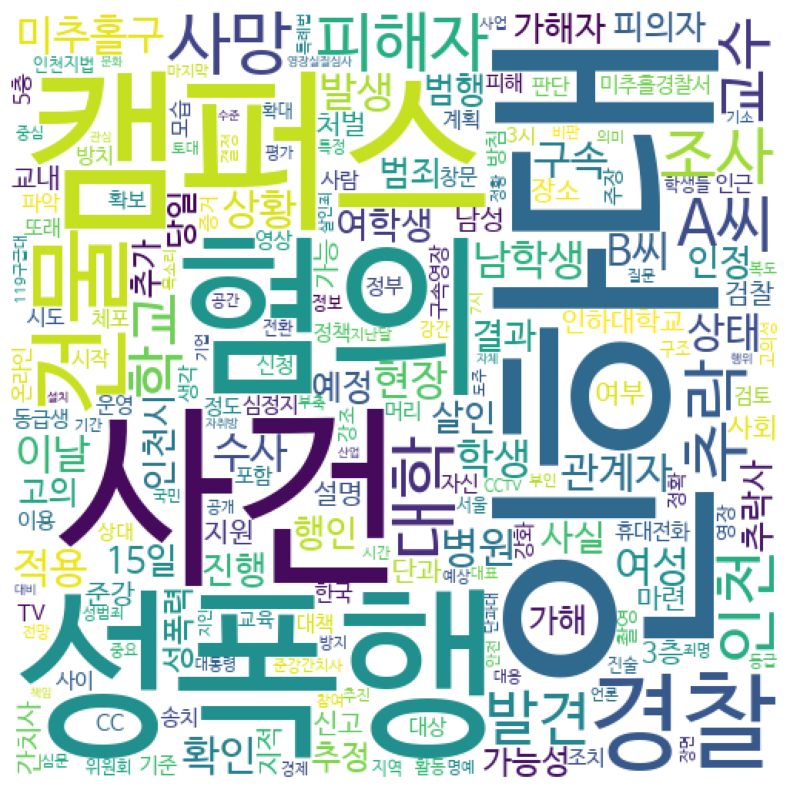

In [11]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(key_words.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 본문 단어 빈도 분석

In [12]:
cor = bkp.keywords_list(news_df['본문'])

In [13]:
bow = []
for i in range(len(cor)):
    word = okt.nouns(cor[i])
    bow.append(word)

In [14]:
news = bkp.word_counter(bow)
news = bkp.counter_to_DataFrame(news)

In [15]:
news = news[news["단어"].str.len() >=2].reset_index(drop = True)

In [16]:
news.head(30)

,단어,빈도
0,인하대,698
1,인천,444
2,혐의,366
3,성폭행,361
4,캠퍼스,329
5,사건,288
6,추락,257
7,학년,220
8,미추홀,216
9,남학생,197


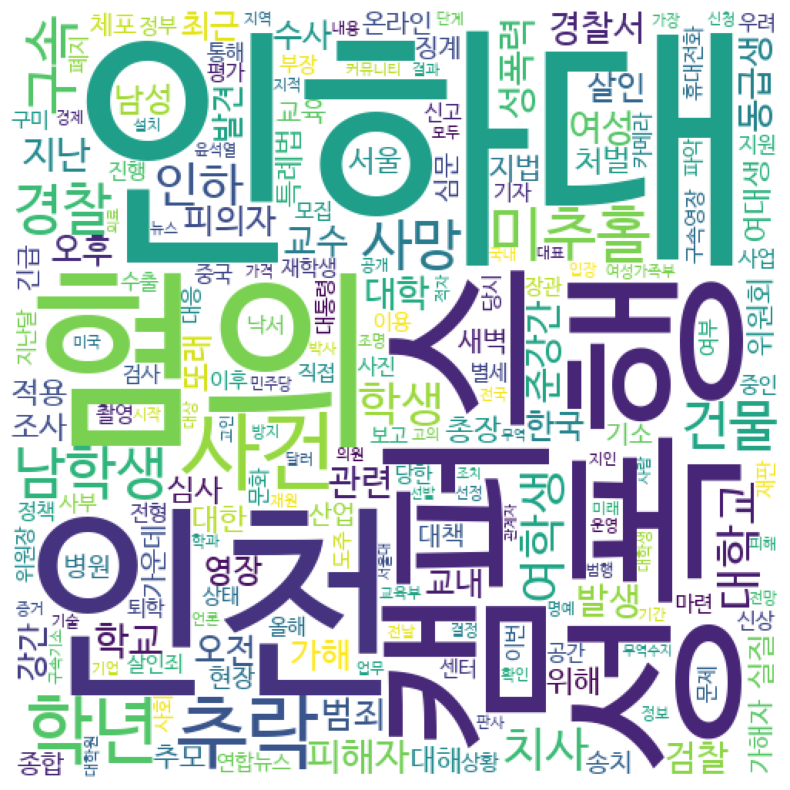

In [17]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(news.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 제목 단어 빈도 분석

In [18]:
title = bkp.keywords_list(news_df['제목'])

In [19]:
words = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    words.append(word)

In [20]:
news_titles = bkp.word_counter(words)
news_titles = bkp.counter_to_DataFrame(news_titles)

In [21]:
news_titles= news_titles[news_titles["단어"].str.len() >=2].reset_index(drop = True)

In [22]:
news_titles = news_titles.head(20)

<AxesSubplot:xlabel='빈도', ylabel='단어'>

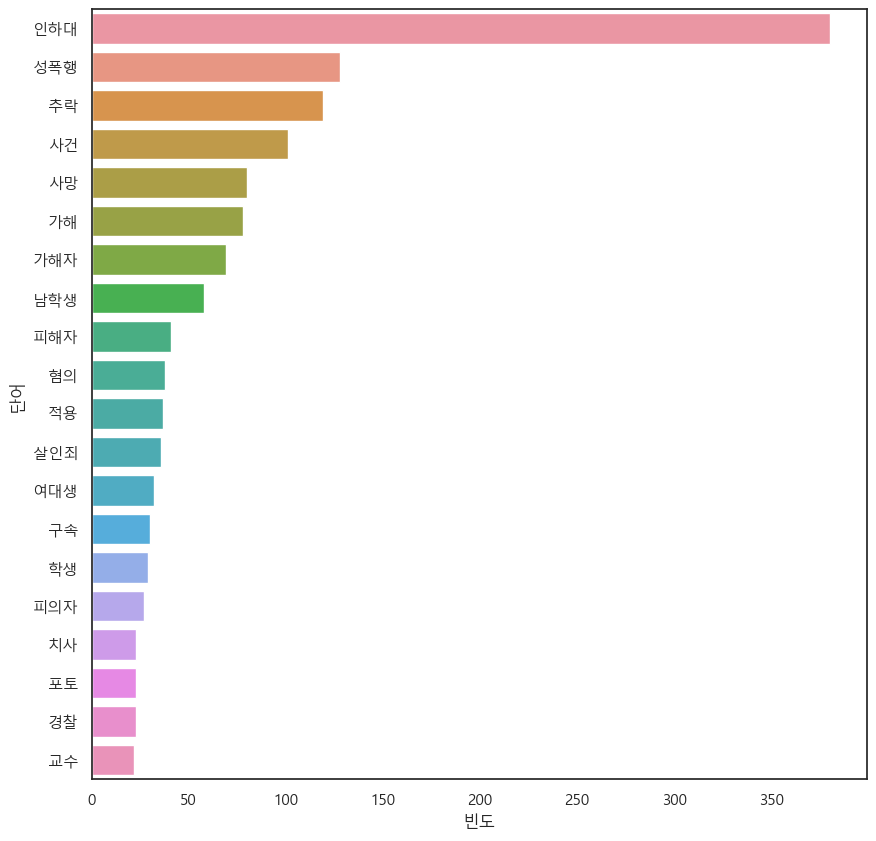

In [23]:
sns.barplot(data = news_titles, x = '빈도', y = '단어')

## 키워드 분석 with Bigram

In [24]:
from nltk import bigrams

In [26]:
wor = []

for sentence in bow:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '성폭행':
            wor.append(t[1])
        elif t[1] == '성폭행':
            wor.append(t[0])

In [27]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [28]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True)

<AxesSubplot:xlabel='빈도', ylabel='단어'>

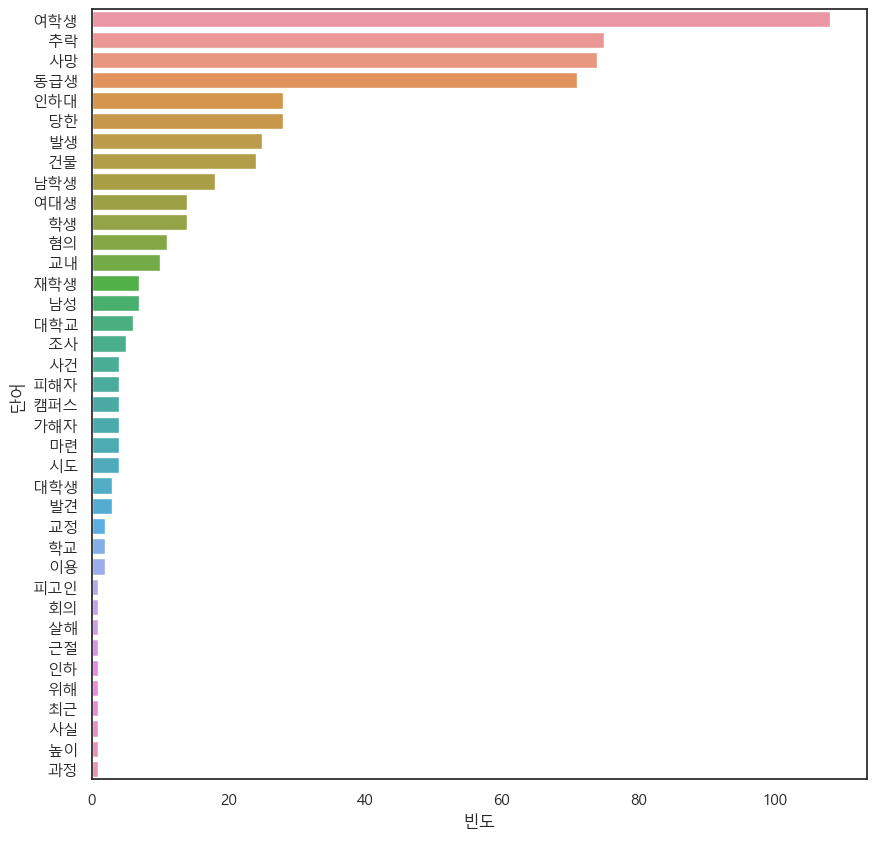

In [29]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

In [31]:
wor = []

for sentence in bow:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '여대생':
            wor.append(t[1])
        elif t[1] == '여대생':
            wor.append(t[0])

In [32]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [33]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True)

<AxesSubplot:xlabel='빈도', ylabel='단어'>

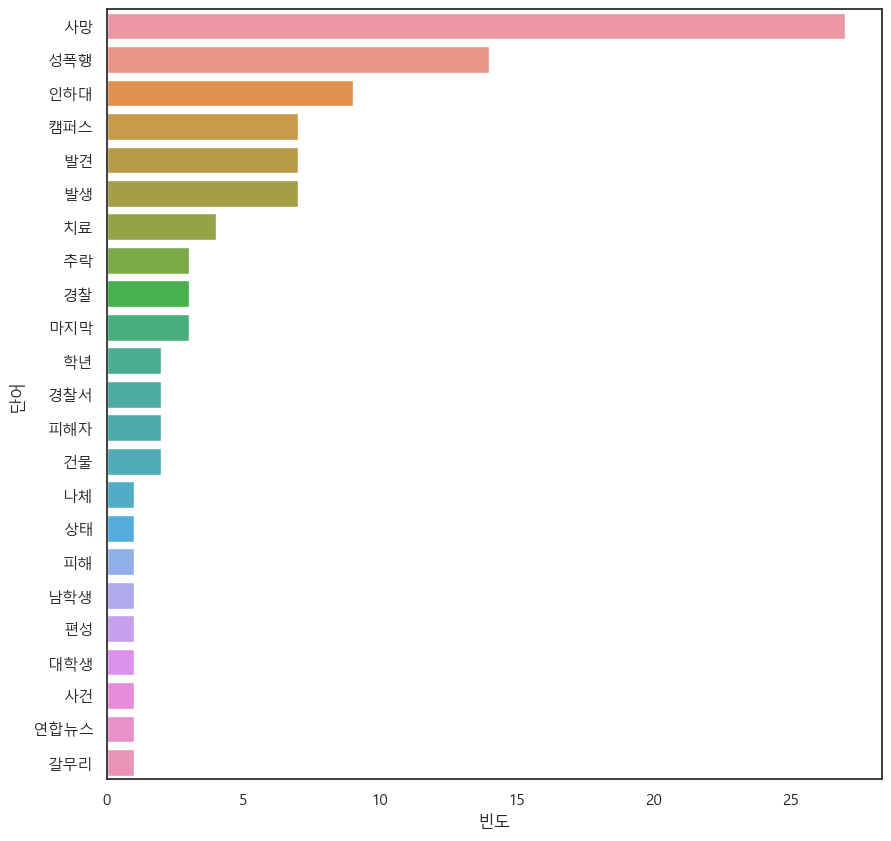

In [34]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

## 제목 분석 with Bigram

In [35]:
title = bkp.keywords_list(news_df['제목'])

In [36]:
bot = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    bot.append(word)

In [37]:
wors = []

for sentence in bot:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '인하대':
            wors.append(t[1])
        elif t[1] == '인하대':
            wors.append(t[0])

In [38]:
counter = {}

for word in wors:
    if not word in counter:
        counter[word] = 1
    if word in counter:
        counter[word] +=1
        
title_df = bkp.counter_to_DataFrame(counter)
title_df = title_df[title_df['단어'].str.len() >= 2].reset_index(drop = True)

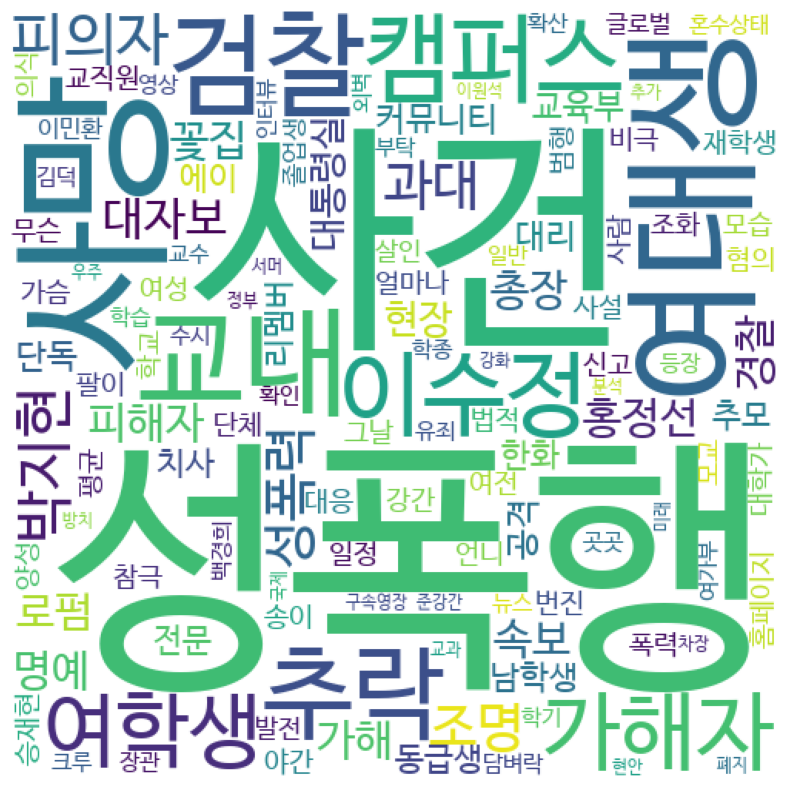

In [39]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(title_df.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 특정 단어 사용 고빈도 언론사 추출

In [40]:
uni_girl = news_df[news_df['제목'].str.contains('여대생')]

In [41]:
bkp.press_counter(uni_girl)

,언론사,기사
0,중앙일보,8
1,세계일보,8
2,서울신문,6
3,동아일보,5
4,조선일보,3
5,경향신문,1
6,문화일보,1


In [42]:
uni_boy = news_df[news_df['제목'].str.contains('남학생')]

In [43]:
bkp.press_counter(uni_boy)

,언론사,기사
0,세계일보,16
1,경향신문,10
2,서울신문,8
3,국민일보,5
4,동아일보,5
5,조선일보,4
6,중앙일보,4
7,문화일보,3
8,한국일보,2
9,한겨레,1


In [44]:
victim = news_df[news_df['제목'].str.contains('강간')]

In [45]:
bkp.press_counter(victim)

,언론사,기사
0,조선일보,6
1,서울신문,5
2,국민일보,5
3,동아일보,3
4,중앙일보,3
5,경향신문,2
6,세계일보,1
7,한겨레,1
8,문화일보,1


In [46]:
girl_word = news_df[news_df['본문'].str.contains('여대생')]

In [47]:
bkp.press_counter(girl_word)

,언론사,기사
0,세계일보,16
1,동아일보,8
2,서울신문,6
3,조선일보,5
4,중앙일보,5
5,문화일보,5
6,국민일보,2
7,경향신문,2
8,한겨레,2
